# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations
----
* The scatter plots show no pattern or relationship between cloudiness and latitude, as well as humidity and latitude. However, the latitude vs. temperature scatterplot, shows that the temperature increases as the latitude gets closer to 0 and 40.

Looking at the line plotted on the scatterplots for the northern and southern hemispheres, the following observations were noted:
* For max temperature and cloudiness, there seems to be a negative correlation for the northern hemisphere and a positive correlation for the southern hemisphere. Humidity showed a negative correlation for both hemispheres. Wind speed shows a positive correlation for the northern hemisphere and negative for southern.
* No r-squared showed a strong positive or negative correlation. Max Temp, with the highest r-quared values of 0.37 and 0.43, for northern and southern hemipheres, respectively. These values are small values to consider  for a valid fit for the model. However, checking some points in the southern hemisphere, there seems to be a good correlation for the Max Temp linear regression model, southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
cities

['sabzevar',
 'rungata',
 'santa cruz',
 'cape town',
 'kamenskoye',
 'hambantota',
 'punta arenas',
 'barrow',
 'busselton',
 'campo grande',
 'porkhov',
 'sao joao da barra',
 'ust-barguzin',
 'arraial do cabo',
 'butaritari',
 'mar del plata',
 'kedrovyy',
 'kavieng',
 'puerto ayora',
 'san andres',
 'dikson',
 'jamestown',
 'sovetskiy',
 'touros',
 'arkhangelos',
 'tonj',
 'east london',
 'nome',
 'taolanaro',
 'tasiilaq',
 'hilo',
 'carnarvon',
 'hobart',
 'cabo san lucas',
 'mataura',
 'rikitea',
 'esso',
 'ushuaia',
 'illoqqortoormiut',
 'tuktoyaktuk',
 'qaanaaq',
 'mareeba',
 'tiarei',
 'bethel',
 'barentsburg',
 'vaini',
 'saint-philippe',
 'yellowknife',
 'north bend',
 'kyaikkami',
 'usinsk',
 'noumea',
 'luderitz',
 'dunedin',
 'port alfred',
 'sumbawa',
 'mul',
 'xuddur',
 'ardakan',
 'upernavik',
 'severo-kurilsk',
 'thompson',
 'togur',
 'praia',
 'klaksvik',
 'bengkulu',
 'juchitan',
 'kindu',
 'nuuk',
 'bambanglipuro',
 'vardo',
 'port elizabeth',
 'susangerd',
 'dongs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Saving partial query URL for the API weather call loop
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
counter = 0
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('''Beginning Data Retrieval
-----------------------------''')
for city in cities:
    time.sleep(1)
    try:
        city_response = requests.get(query_url + city).json()
        city_name.append(city_response['name'])
        latitude.append(city_response['coord']['lat'])
        longitude.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        humidity.append(city_response['main']['humidity'])
        cloudiness.append(city_response['clouds']['all'])
        wind_speed.append(city_response['wind']['speed'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        print(f'Processing Record {counter} | {city}')
        counter = counter + 1
        
    except KeyError:
        print('City not found. Skipping...')
    # Adding a one second interval between queries to stay within API query limits
        
print('''-----------------------------
Data Retrieval Completed    
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 0 | sabzevar
City not found. Skipping...
Processing Record 1 | santa cruz
Processing Record 2 | cape town
City not found. Skipping...
Processing Record 3 | hambantota
Processing Record 4 | punta arenas
Processing Record 5 | barrow
Processing Record 6 | busselton
Processing Record 7 | campo grande
Processing Record 8 | porkhov
Processing Record 9 | sao joao da barra
Processing Record 10 | ust-barguzin
Processing Record 11 | arraial do cabo
Processing Record 12 | butaritari
Processing Record 13 | mar del plata
Processing Record 14 | kedrovyy
Processing Record 15 | kavieng
Processing Record 16 | puerto ayora
Processing Record 17 | san andres
Processing Record 18 | dikson
Processing Record 19 | jamestown
Processing Record 20 | sovetskiy
Processing Record 21 | touros
City not found. Skipping...
Processing Record 22 | tonj
Processing Record 23 | east london
Processing Record 24 | nome
City not found. Skipping...
Process

Processing Record 225 | clyde river
Processing Record 226 | chuy
Processing Record 227 | bambous virieux
Processing Record 228 | braganca
Processing Record 229 | puerto concordia
Processing Record 230 | elk point
Processing Record 231 | saskylakh
Processing Record 232 | balingasay
Processing Record 233 | sterling
Processing Record 234 | praya
Processing Record 235 | villa carlos paz
Processing Record 236 | caravelas
Processing Record 237 | maragogi
Processing Record 238 | port hardy
Processing Record 239 | erzin
City not found. Skipping...
Processing Record 240 | mochudi
Processing Record 241 | laguna
City not found. Skipping...
Processing Record 242 | husavik
Processing Record 243 | komsomolskiy
Processing Record 244 | uglegorsk
Processing Record 245 | tilichiki
Processing Record 246 | baragaon
Processing Record 247 | nalut
City not found. Skipping...
City not found. Skipping...
Processing Record 248 | pechenga
City not found. Skipping...
Processing Record 249 | rawson
Processing Reco

Processing Record 454 | syamzha
Processing Record 455 | grand island
Processing Record 456 | portland
Processing Record 457 | boqueirao
Processing Record 458 | namatanai
Processing Record 459 | tianpeng
Processing Record 460 | bathsheba
Processing Record 461 | le port
Processing Record 462 | port moresby
Processing Record 463 | salem
Processing Record 464 | vanavara
Processing Record 465 | turukhansk
Processing Record 466 | hato mayor
Processing Record 467 | ipora
Processing Record 468 | nishihara
Processing Record 469 | sharlyk
Processing Record 470 | ekibastuz
Processing Record 471 | mahibadhoo
City not found. Skipping...
Processing Record 472 | zhaotong
City not found. Skipping...
Processing Record 473 | cortez
Processing Record 474 | saint-augustin
Processing Record 475 | melfi
Processing Record 476 | salta
Processing Record 477 | teguise
Processing Record 478 | haimen
City not found. Skipping...
Processing Record 479 | salym
Processing Record 480 | hasaki
Processing Record 481 | w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Converting the the city weather raw data to a DataFrame:
city_data = pd.DataFrame({'City': city_name,
                'Lat': latitude,
                'Lng': longitude,
                'Max Temp': max_temp,
                'Humidity': humidity,
                'Cloudiness': cloudiness,
                'Wind Speed': wind_speed,
                'Country': country,
                'Date': date})


# Saving the DataFrame as CSV
city_data.to_csv('output_data/city_weather_data.csv')
#Display DF
city_data.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [7]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabzawār,36.21,57.68,83.17,25,0,6.58,IR,1595733138
1,Santa Cruz de la Sierra,-17.80,-63.17,55.40,66,90,8.05,BO,1595732886
2,Cape Town,-33.93,18.42,57.20,93,75,2.24,ZA,1595733136
3,Hambantota,6.12,81.12,78.80,100,90,8.05,LK,1595733144
4,Punta Arenas,-53.15,-70.92,24.80,85,48,12.75,CL,1595733145


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# inspecting humidity > 100%
max_humidity = city_data.loc[city_data['Humidity'] > 100]
max_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.180105,19.414660,69.038813,71.354276,47.265271,7.477016,1.595733e+09
std,32.919938,88.354805,13.160681,19.684357,39.304524,5.545333,2.645192e+02
min,-54.800000,-179.170000,24.800000,3.000000,0.000000,0.540000,1.595733e+09
25%,-3.750000,-57.750000,60.010000,62.000000,2.000000,3.270000,1.595733e+09
50%,24.850000,22.260000,70.000000,74.000000,40.000000,6.060000,1.595733e+09
75%,48.810000,100.580000,79.380000,87.000000,90.000000,10.290000,1.595734e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,32.210000,1.595734e+09


In [10]:
# Geting the indices of cities that have humidity over 100%.
max_humidity_index = max_humidity.index
max_humidity_index

Int64Index([], dtype='int64')

In [11]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" to make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(max_humidity_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabzawār,36.21,57.68,83.17,25,0,6.58,IR,1595733138
1,Santa Cruz de la Sierra,-17.80,-63.17,55.40,66,90,8.05,BO,1595732886
2,Cape Town,-33.93,18.42,57.20,93,75,2.24,ZA,1595733136
3,Hambantota,6.12,81.12,78.80,100,90,8.05,LK,1595733144
4,Punta Arenas,-53.15,-70.92,24.80,85,48,12.75,CL,1595733145


In [12]:
# Extract relevant fields from the data frame
relevant_data = city_data[['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

# Export the City_Data into a csv
relevant_data.to_csv('output_data/relevant_data.csv')
relevant_data

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,36.21,83.17,25,0,6.58
1,-17.80,55.40,66,90,8.05
2,-33.93,57.20,93,75,2.24
3,6.12,78.80,100,90,8.05
4,-53.15,24.80,85,48,12.75
...,...,...,...,...,...
568,37.78,69.80,83,1,0.69
569,35.30,70.95,55,0,7.78
570,-26.02,46.11,58,0,10.25
571,52.71,55.40,87,0,2.24


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

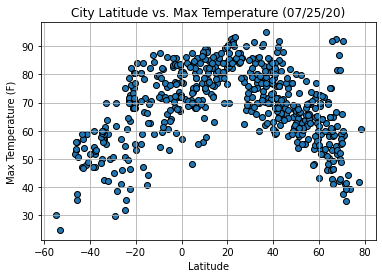

In [13]:
# Generating a scatter plot: Max Temp vs. Latitude
from datetime import date
today = date.today()
# dd/mm/YY
d1 = today.strftime("%m/%d/%y")
plt.scatter(city_data['Lat'], city_data['Max Temp'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({d1})')
plt.grid()
plt.savefig('01_lat_vs_max_temp.png', bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

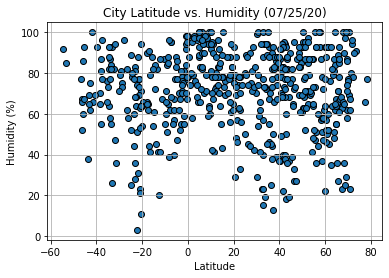

In [14]:
plt.scatter(city_data['Lat'], city_data['Humidity'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({d1})')
plt.grid()
plt.savefig('02_lat_vs_humidity.png', bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

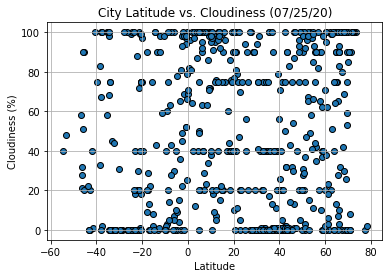

In [15]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({d1})')
plt.grid()
plt.savefig('03-lat_vs_cloudiness.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

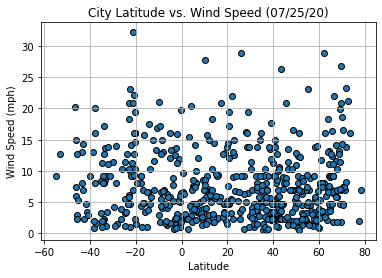

In [16]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({d1})')
plt.grid()
plt.savefig('04_lat_vs_humidity.png', bbox_inches='tight')
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x_values, y_values, northern_southern):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # calculating the fit
    regress_values = x_values * slope + intercept
    # text holding the line equation:
    print(f'The r-squared is: {rvalue ** 2}')
    equation = f'y = {round(slope, 2)}x + {round(intercept)}'
    # equation position
    if slope > 0:
        x_coord = x_values.min() * .4
        y_coord = y_values.min() + 10
    else:
        x_coord = x_values.min() * .6
        y_coord = y_values.min() + 10
    # labels
    y_label = y_values.name
    
    # ploting
    plt.scatter(x_values, y_values)
    plt.annotate(equation, (x_coord,y_coord), fontsize=15, color='red')
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.savefig(f'{northern_southern}_vs_{y_label}.png')
    plt.show()
    return

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = city_data.loc[city_data['Lat'] >= 0]
southern_data = city_data.loc[city_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3741884528786422


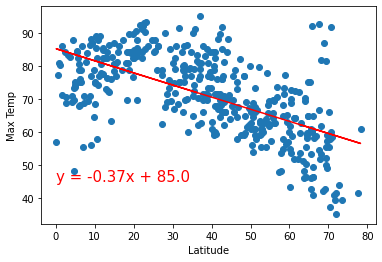

In [25]:
lin_regress(northern_data['Lat'], northern_data['Max Temp'], 'nt')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43508123944509536


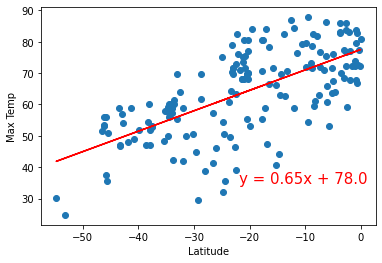

In [26]:
lin_regress(southern_data['Lat'], southern_data['Max Temp'], 'st')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.029475897963292856


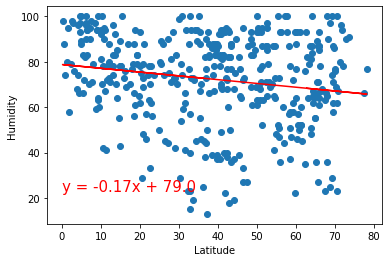

In [27]:
lin_regress(northern_data['Lat'], northern_data['Humidity'], 'nt')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002834852842043781


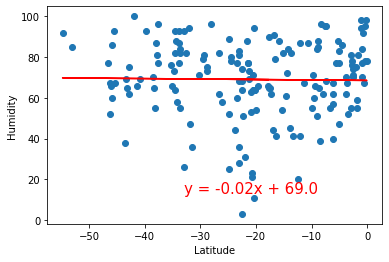

In [28]:
lin_regress(southern_data['Lat'], southern_data['Humidity'], 'st')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029475897963292856


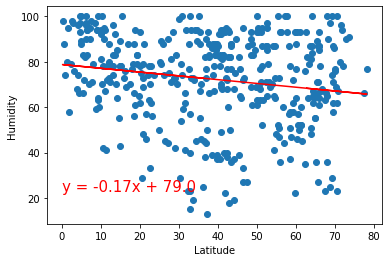

In [29]:
lin_regress(northern_data['Lat'], northern_data['Humidity'], 'nt')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011874914190014761


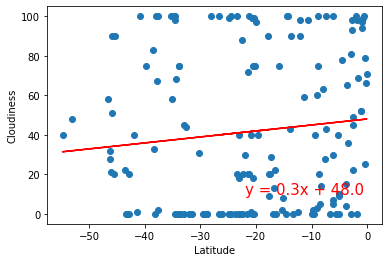

In [30]:
lin_regress(southern_data['Lat'], southern_data['Cloudiness'], 'st')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015238063663318532


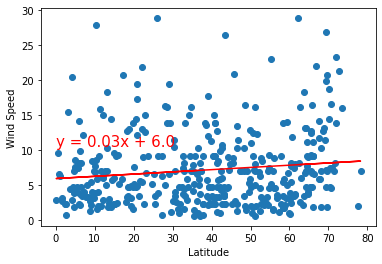

In [31]:
lin_regress(northern_data['Lat'], northern_data['Wind Speed'], 'nt')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008946888474388688


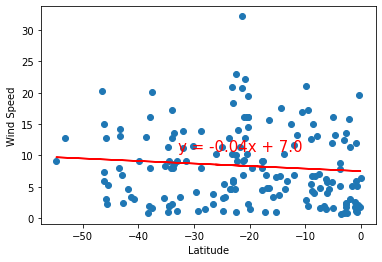

In [32]:
lin_regress(southern_data['Lat'], southern_data['Wind Speed'], 'st')